# Session 19 : Assignment 1 - Raghunath

    In this assignment students need to predict wheter a person makes over 50K per year or not from classic adult 
    dataset using XGBoost. The description of the dataset is as follows:

#### Dataset Information:
    Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was 
    extracted using the following conditions:
    ((AGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)
    
    Attribute Information:
    Listing of attributes:
    >50K, <=50K.
    age: continuous.
    workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    fnlwgt: continous.
    education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, Masters, 
    1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    education-num: continuous.
    marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-abent, 
    Married-AF-spouse.
    occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-speciality, 
    Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, 
    Priv-house-serv, Protective-serv, Armed-Forces.
    relationship: Wife, Own-child, Husband, Not-in-Family, Other-relative, Unmarried.
    sex: Female, Male.
    capital-gain: continous.
    capital-loss: continuos.
    hours-per-week: continuos.
    native-country: United-States, Cambodia,

    train_set = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
    test_set = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
    
    solution_1 = https://yanhan.github.io/posts/2017-02-15-analysis-of-the-adult-data-set-from-uci-machine-learning-repository.ipynb.html
    solutions_2 = https://jessesw.com/XG-Boost/
    

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_svmlight_files
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, make_scorer, precision_recall_fscore_support, roc_auc_score
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

In [2]:
headers = ['age', 'workclass','fnlwgt','education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [3]:
train_set = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, skipinitialspace=True)
train_set.columns = headers
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_set = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", skiprows=1, skipinitialspace=True, header=None)
test_set.columns = headers
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
print("Shape of Train Set : {}".format(train_set.shape))
print("Shape of Test Set : {}".format(test_set.shape))

Shape of Train Set : (32561, 15)
Shape of Test Set : (16281, 15)


In [6]:
# append or concatenate dataframes into one
#adult_data = pd.concat([data1, data2], ignore_index=True)
adult_data = train_set.append(test_set, ignore_index=True)
print("Shape of adult data Set : {}".format(adult_data.shape))

Shape of adult data Set : (48842, 15)


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def display_plot(df, col_to_exclude, object_mode = True):
    """
        This function plots the count or distribution of each column in the dataframe based on specified inputs
        @Args
        df: pandas dataframe
        col_to_exclude: specific column to exclude from the plot, used for excluded key
        object_mode: whether to plot on object data types or not (default: True)
        Return
        No object returned but visualized plot will return based on specified inputs
    """
    n = 0
    this = []
    if object_mode:
        nrows = 4
        ncols = 2
        width = 14
        height = 50
    else:
        nrows = 2
        ncols = 2
        width = 14
        height = 10
    for column in df.columns:
        if object_mode:
            if (df[column].dtypes == 'O') & (column != col_to_exclude):
                this.append(column)

        else:
            if (df[column].dtypes != 'O'):
                this.append(column)

    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(width, height))
    
    for row in range(nrows):
        for col in range(ncols):
            if object_mode & n < len(this) :
                g = sns.countplot(df[this[n]], ax=ax[row][col])
                g.set_xticklabels(g.get_xticklabels(), rotation=60)  
                n+=1
            else:
                g = sns.countplot(df[this[n]], ax=ax[row][col])
                g.set_xticklabels(g.get_xticklabels(), rotation=30)
                n+=1


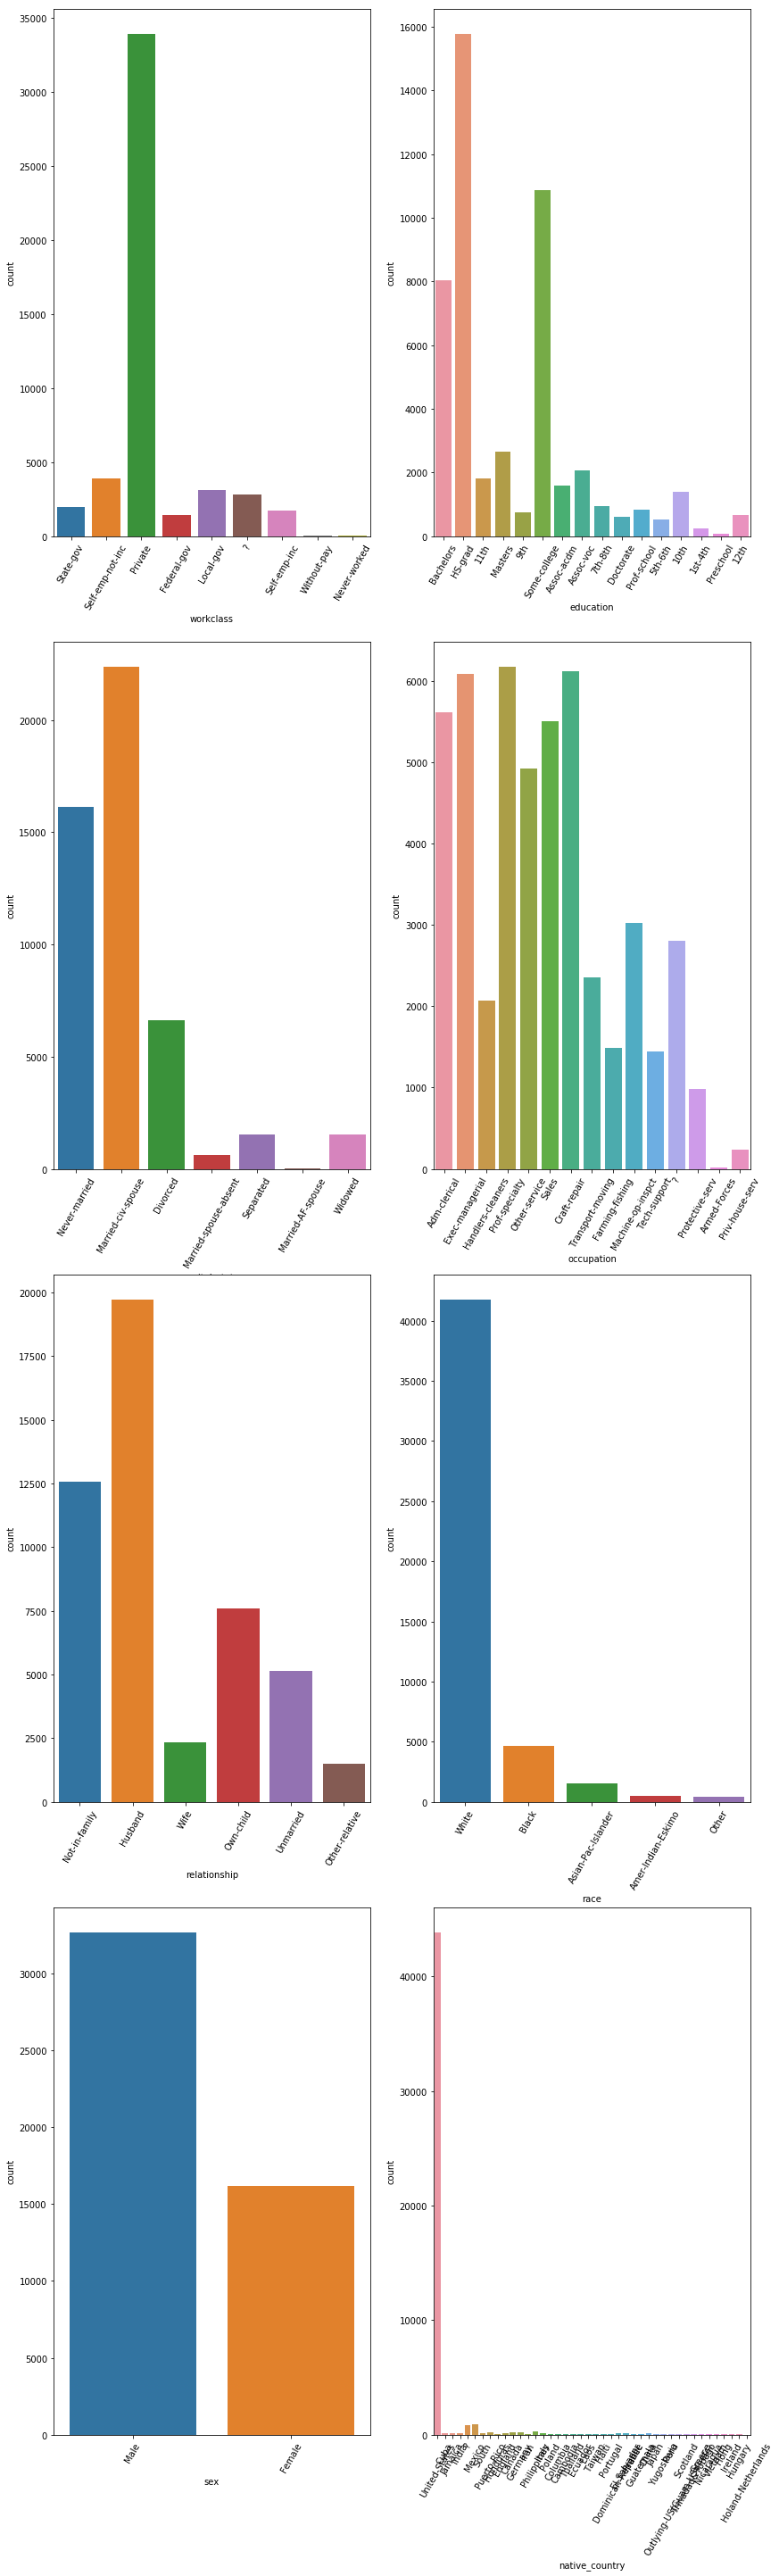

In [8]:
display_plot(adult_data, 'wage_class', object_mode = True)

In [9]:
adult_data.drop("capital_gain", axis=1, inplace=True)
adult_data.drop("capital_loss", axis=1, inplace=True)

In [10]:
# preprocessing marital_status
adult_data.marital_status.replace({"Married-spouse-absent": "No-Spouse", "Separated": "No-Spouse",
                                   "Married-AF-spouse": "No-Spouse"}, inplace=True)

In [11]:
#preprocessign education
adult_data.education.replace({"Preschool": "LowerSchoolDropOut", "1st-4th": "LowerSchoolDropOut", "5th-6th": "LowerSchoolDropOut", 
                               "7th-8th":"HighSchoolDropOut", "9th":"HighSchoolDropOut", "":"HighSchoolDropOut"},
                              inplace=True)

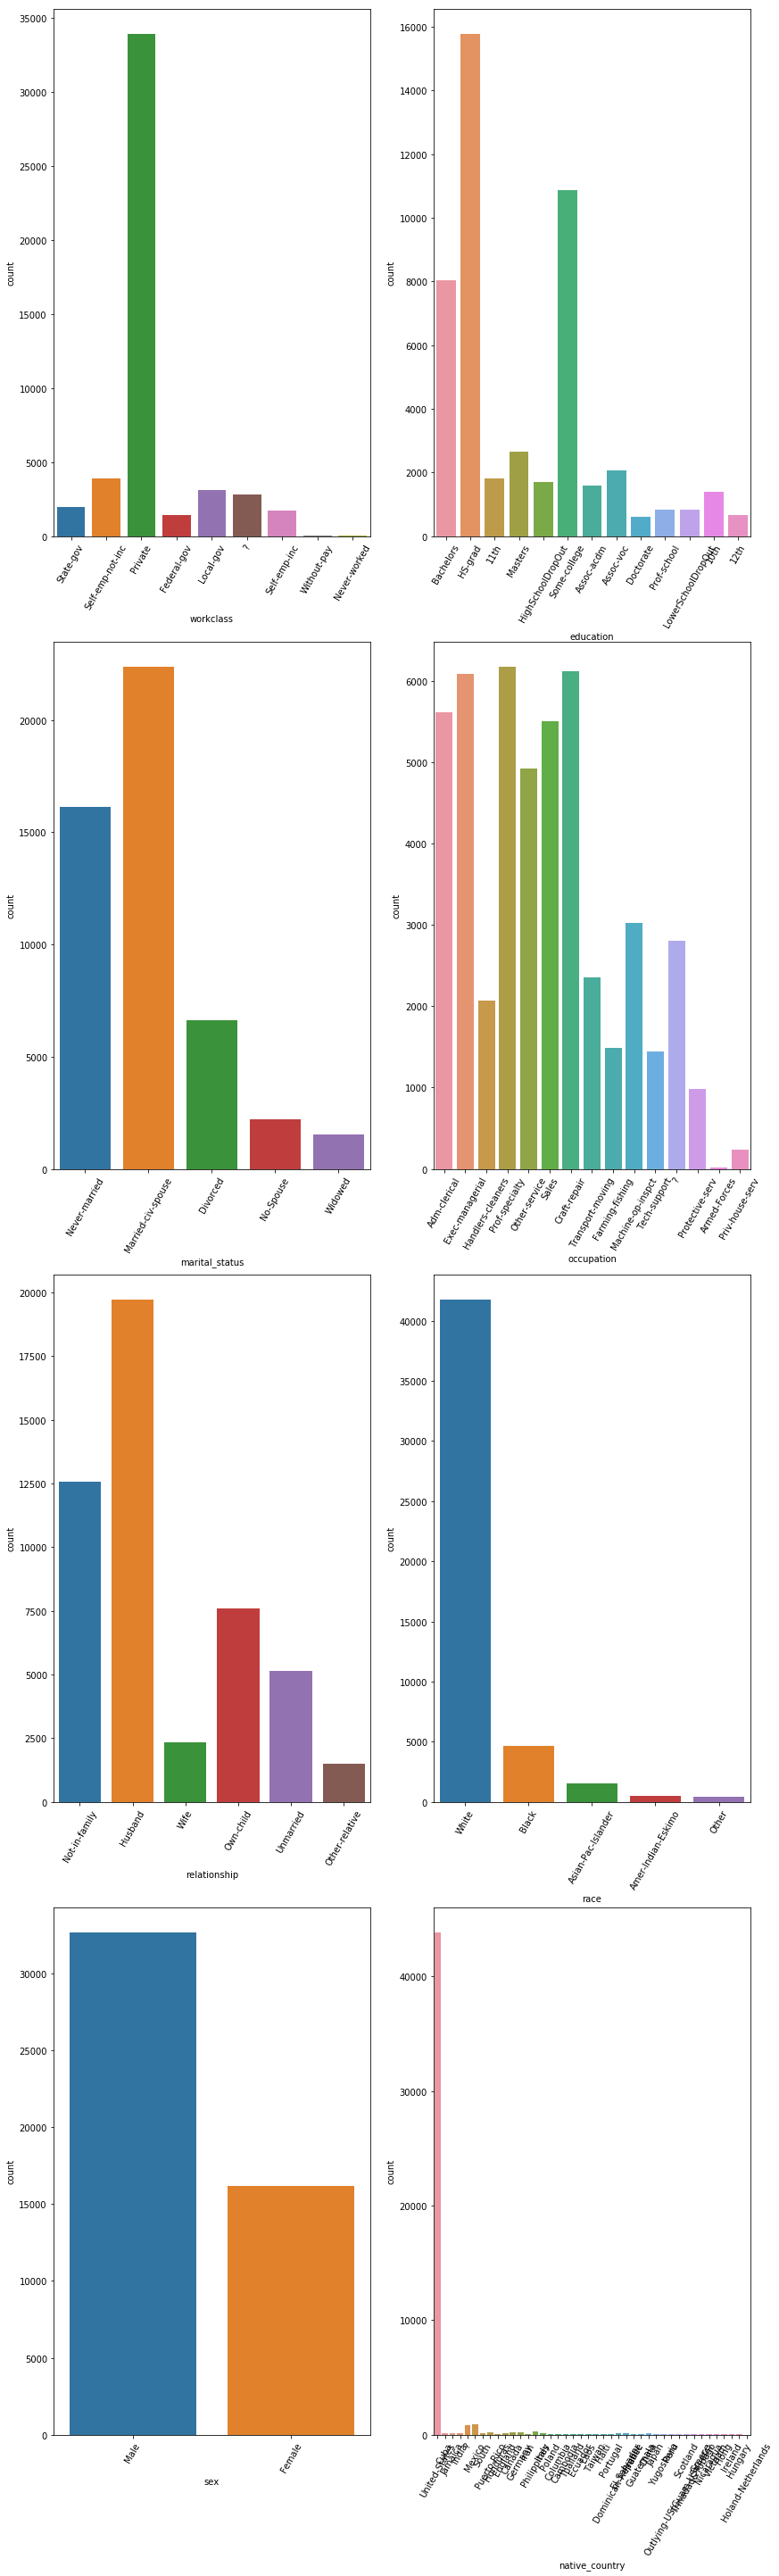

In [12]:
display_plot(adult_data, 'wage_class', object_mode = True)

In [13]:
sex_attribute = {'Male':0,'Female':1}
adult_data['sex'] = [sex_attribute[item] for item in adult_data['sex']] 

In [14]:
adult_data.age = adult_data.age.astype(float)
adult_data.fnlwgt = adult_data.fnlwgt.astype(float)
adult_data.education_num = adult_data.education_num.astype(float)
adult_data.hours_per_week = adult_data.hours_per_week.astype(float)

In [15]:
for col in adult_data.columns: 
    if (adult_data[col].dtype != "float64") & (adult_data[col].dtype != "int64"):
        adult_data[col].replace({"?": "Unknown"}, inplace=True)
        print("Column Name: {0} , Type: {1}".format(col, adult_data[col].dtype))
        print (adult_data[col].unique())

Column Name: workclass , Type: object
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Unknown' 'Self-emp-inc' 'Without-pay' 'Never-worked']
Column Name: education , Type: object
['Bachelors' 'HS-grad' '11th' 'Masters' 'HighSchoolDropOut' 'Some-college'
 'Assoc-acdm' 'Assoc-voc' 'Doctorate' 'Prof-school' 'LowerSchoolDropOut'
 '10th' '12th']
Column Name: marital_status , Type: object
['Never-married' 'Married-civ-spouse' 'Divorced' 'No-Spouse' 'Widowed']
Column Name: occupation , Type: object
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Unknown'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Column Name: relationship , Type: object
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
Column Name: race , Type: object
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
Column Name: nati

In [16]:
adult_data.wage_class.replace({"<=50K": 0, "<=50K.": 0, ">50K": 1, ">50K.":1}, inplace=True)

In [17]:
numeric_columns = ["age","fnlwgt","education_num","hours_per_week"]
categorical_columns = ["workclass", "education", "marital_status", "occupation", "relationship",
    "race", "sex", "native_country"]


In [18]:
adult_data = pd.get_dummies(adult_data, columns=categorical_columns,  prefix_sep='_')

In [19]:
from sklearn.preprocessing import Normalizer
adult_data[numeric_columns] = Normalizer().fit_transform(adult_data[numeric_columns])

In [20]:
scaler = StandardScaler()
adult_data[numeric_columns] = scaler.fit_transform(adult_data[numeric_columns])

In [21]:
X = adult_data.drop("wage_class", axis=1)

#X = pd.get_dummies(adult_data_X, prefix_sep='_', drop_first=True)
y = adult_data["wage_class"]
#X = housing_data_train_X.drop("SalePrice", axis=1)
# X head
X.head()

,age,fnlwgt,education_num,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Unknown,native_country_Vietnam,native_country_Yugoslavia
0,0.611865,-0.110588,1.145564,0.591495,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.918789,0.008995,0.992802,-0.507000,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,-0.422108,0.303705,-0.504070,-0.417141,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.265275,0.291875,-0.660066,-0.463140,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.717759,0.342438,-0.547547,-0.622476,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [23]:
X.shape

(48842, 101)

In [24]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': 1.0,
    'n_estimators': 5
}

In [25]:
xg_reg = xgb.XGBRegressor(objective ='binary:logistic', learning_rate = 1.0, silent = 1.0,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [26]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [27]:
xg_reg.score(X_train,y_train)

0.6315131974504677

In [28]:
preds

array([6.2481892e-01, 2.6659478e-04, 4.6682805e-01, ..., 9.0832859e-01,
       6.9159293e-01, 1.2076786e-03], dtype=float32)

In [29]:
xg_reg.score(X_test,y_test)

0.2950687017875159

In [30]:
bst = XGBRegressor(**params).fit(X_train, y_train)

In [31]:
bst.score(X_train, y_train)

0.32222022488909696

In [32]:
bst.score(X_test,y_test)

0.31358644640905364

In [33]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'learning_rate': 1.0,
    'silent': 1.0,
    'n_estimators': 100
}

In [34]:
bst = XGBRegressor(**params).fit(X_train, y_train)

In [35]:
bst.score(X_train, y_train)

0.6315131974504677

In [36]:
bst.score(X_test,y_test)

0.2950687017875159